<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)** https://bigquery.cloud.google.com/

you can also run queries / debug Bigquery SQL on their dashboard here https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

In [204]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV

%matplotlib inline



In [205]:
project_id = "bigquery-dsi-medhi"


sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.businesses] 

"""

df = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 21.0% done. Elapsed 7.52 s.
  Got page: 2; 42.0% done. Elapsed 12.89 s.
  Got page: 3; 62.0% done. Elapsed 20.41 s.
  Got page: 4; 83.0% done. Elapsed 26.64 s.
  Got page: 5; 100.0% done. Elapsed 31.9 s.
Got 152832 rows.

Total time taken 38.47 s.
Finished at 2016-12-19 19:10:15.


In [206]:
df.T.head(11)

,0,1,2,3,4,5,6,7,8,9,...,152822,152823,152824,152825,152826,152827,152828,152829,152830,152831
business_id,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,XziiAJUc8cgj3McljtnYVw,...,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg,RO1fBofbml7ygeY2AiWFYg
name,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,Johnny Rockets,...,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg,The Daily Egg
review_count,39,39,39,39,39,39,39,39,39,39,...,141,141,141,141,141,141,141,141,141,141
city,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,...,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas,Las Vegas
stars,3,3,3,3,3,3,3,3,3,3,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
categories,"['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...","['Burgers', 'American (Traditional)', 'Sandwic...",...,"['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre...","['Food', 'Coffee & Tea', 'Mediterranean', 'Bre..."
latitude,36.1145,36.1145,36.1145,36.1145,36.1145,36.1145,36.1145,36.1145,36.1145,36.1145,...,36.0945,36.0945,36.0945,36.0945,36.0945,36.0945,36.0945,36.0945,36.0945,36.0945
longitude,-115.169,-115.169,-115.169,-115.169,-115.169,-115.169,-115.169,-115.169,-115.169,-115.169,...,-115.209,-115.209,-115.209,-115.209,-115.209,-115.209,-115.209,-115.209,-115.209,-115.209
neighborhoods,['The Strip'],['The Strip'],['The Strip'],['The Strip'],['The Strip'],['The Strip'],['The Strip'],['The Strip'],['The Strip'],['The Strip'],...,[],[],[],[],[],[],[],[],[],[]
variable,attributes.Ambience.trendy,hours.Wednesday.close,hours.Monday.close,attributes.Good For Groups,hours.Monday.open,attributes.Attire,hours.Thursday.close,attributes.Parking.valet,hours.Saturday.open,attributes.Alcohol,...,hours.Saturday.close,attributes.Good For.dinner,attributes.Waiter Service,attributes.Price Range,attributes.Has TV,hours.Monday.open,hours.Tuesday.close,hours.Wednesday.open,attributes.Ambience.touristy,attributes.Take-out


In [207]:
for col in df.columns.values:
    print col

business_id
name
review_count
city
stars
categories
latitude
longitude
neighborhoods
variable
value


In [208]:
df.shape

(152832, 11)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [210]:
df.isnull().sum()

business_id      0
name             0
review_count     0
city             0
stars            0
categories       0
latitude         0
longitude        0
neighborhoods    0
variable         0
value            0
dtype: int64

In [211]:
df.dtypes

business_id       object
name              object
review_count       int64
city              object
stars            float64
categories        object
latitude         float64
longitude        float64
neighborhoods     object
variable          object
value               bool
dtype: object

<p><center> The mean of each series we have already enables us to differenciate cities.</center></p>

In [346]:
df.groupby(['city']).mean()

KeyError: 'city'

In [215]:
# let's create a target and predictor matrix
# predictor = in a first attempt, only restricting to numerical values 

In [216]:
df['is_vegas'] = df.city.map(lambda x: 1 if x == 'Las Vegas' else 0)

In [217]:
df.head()

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value,is_vegas
0,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],attributes.Ambience.trendy,False,1
1,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],hours.Wednesday.close,False,1
2,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],hours.Monday.close,False,1
3,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],attributes.Good For Groups,True,1
4,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",36.114471,-115.169292,['The Strip'],hours.Monday.open,False,1


In [272]:
#let's drop the location related columns (except "city")
del df['latitude']
del df['neighborhoods']
del df['longitude']
del df['city']
df.head()

,business_id,name,review_count,stars,categories,variable,value,is_vegas
0,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",attributes.Ambience.trendy,False,1
1,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",hours.Wednesday.close,False,1
2,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",hours.Monday.close,False,1
3,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",attributes.Good For Groups,True,1
4,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",hours.Monday.open,False,1


In [219]:
# let's convert the variable-value couples in columns (from long to wide format)

In [273]:
attributes = ['business_id','name','review_count','stars','categories', 'is_vegas']

In [274]:
df_pt = df.pivot_table(values = 'value',index = attributes, columns = 'variable')

In [275]:
df_pt.reset_index(inplace = True)

In [276]:
df_pt.head()

variable,business_id,name,review_count,stars,categories,is_vegas,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",1,True,None,None,False,...,None,None,None,None,None,None,None,None,None,True
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,3.0,"['Burgers', 'Fast Food', 'Restaurants']",0,True,None,None,False,...,None,None,None,None,None,None,None,None,None,True
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,3.5,"['Bars', 'Nightlife', 'Lounges']",1,True,None,None,False,...,None,None,None,None,None,None,None,None,None,True
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,2.0,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re...",0,True,None,None,None,...,None,None,None,None,None,None,None,None,None,False
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,4.0,"['Breakfast & Brunch', 'Cafes', 'American (Tra...",0,True,None,None,False,...,False,False,False,False,False,False,False,False,False,True


In [277]:
for col in df_pt:
    print col

business_id
name
review_count
stars
categories
is_vegas
attributes.Accepts Credit Cards
attributes.Accepts Insurance
attributes.Ages Allowed
attributes.Alcohol
attributes.Ambience.casual
attributes.Ambience.classy
attributes.Ambience.divey
attributes.Ambience.hipster
attributes.Ambience.intimate
attributes.Ambience.romantic
attributes.Ambience.touristy
attributes.Ambience.trendy
attributes.Ambience.upscale
attributes.Attire
attributes.BYOB
attributes.BYOB/Corkage
attributes.By Appointment Only
attributes.Caters
attributes.Coat Check
attributes.Corkage
attributes.Delivery
attributes.Dietary Restrictions.dairy-free
attributes.Dietary Restrictions.gluten-free
attributes.Dietary Restrictions.halal
attributes.Dietary Restrictions.kosher
attributes.Dietary Restrictions.soy-free
attributes.Dietary Restrictions.vegan
attributes.Dietary Restrictions.vegetarian
attributes.Dogs Allowed
attributes.Drive-Thru
attributes.Good For Dancing
attributes.Good For Groups
attributes.Good For.breakfast
attri

In [278]:
for col in df_pt.columns:
    if ('attributes' in col) or ('hours' in col) or ('open' in col):
        df_pt[col] = df_pt[col].map(lambda x: 1 if x == True else 0)

In [279]:
df_pt.head()

variable,business_id,name,review_count,stars,categories,is_vegas,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,3.0,"['Burgers', 'Fast Food', 'Restaurants']",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,3.5,"['Bars', 'Nightlife', 'Lounges']",1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,2.0,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,4.0,"['Breakfast & Brunch', 'Cafes', 'American (Tra...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [280]:
type(df_pt['categories'][0])

unicode

In [281]:
df_pt['categories'] = df_pt['categories'].map(lambda x: eval(x))

In [282]:
new_cols = []

In [283]:
def split_categories(input_list):
    
    for i in input_list:
        if i not in new_cols:
            new_cols.append(i)
            
    return new_cols

In [285]:
df_pt['categories'].map(lambda l:split_categories(l))

0       [Fast Food, Sandwiches, Restaurants, Burgers, ...
1       [Fast Food, Sandwiches, Restaurants, Burgers, ...
2       [Fast Food, Sandwiches, Restaurants, Burgers, ...
3       [Fast Food, Sandwiches, Restaurants, Burgers, ...
4       [Fast Food, Sandwiches, Restaurants, Burgers, ...
5       [Fast Food, Sandwiches, Restaurants, Burgers, ...
6       [Fast Food, Sandwiches, Restaurants, Burgers, ...
7       [Fast Food, Sandwiches, Restaurants, Burgers, ...
8       [Fast Food, Sandwiches, Restaurants, Burgers, ...
9       [Fast Food, Sandwiches, Restaurants, Burgers, ...
10      [Fast Food, Sandwiches, Restaurants, Burgers, ...
11      [Fast Food, Sandwiches, Restaurants, Burgers, ...
12      [Fast Food, Sandwiches, Restaurants, Burgers, ...
13      [Fast Food, Sandwiches, Restaurants, Burgers, ...
14      [Fast Food, Sandwiches, Restaurants, Burgers, ...
15      [Fast Food, Sandwiches, Restaurants, Burgers, ...
16      [Fast Food, Sandwiches, Restaurants, Burgers, ...
17      [Fast 

In [286]:
for cat in new_cols:
    df_pt[cat] = df_pt['categories'].map(lambda x: 1 if cat in x else 0)


In [287]:
del df_pt['categories']
df_pt.head()


variable,business_id,name,review_count,stars,is_vegas,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,...,Gymnastics,Polish,Tanning,Beer Gardens,Day Spas,Pakistani,Tours,Travel Services,Nail Salons,Parks
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,3.5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,3.5,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,4.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [288]:
df_pt.head()

# it seems that the average review_count is highly correlated with is_vegas, so this looks like a good predictor.
# we will add as well the number of stars given by customers

variable,business_id,name,review_count,stars,is_vegas,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,...,Gymnastics,Polish,Tanning,Beer Gardens,Day Spas,Pakistani,Tours,Travel Services,Nail Salons,Parks
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,3.5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,3.5,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,4.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [292]:
nc = []
y = df_pt['is_vegas']
nc = [col for col in df_pt.columns if (col != 'business_id') and (col != 'name') and (col != 'is_vegas')]

In [293]:
nc

['review_count',
 'stars',
 u'attributes.Accepts Credit Cards',
 u'attributes.Accepts Insurance',
 u'attributes.Ages Allowed',
 u'attributes.Alcohol',
 u'attributes.Ambience.casual',
 u'attributes.Ambience.classy',
 u'attributes.Ambience.divey',
 u'attributes.Ambience.hipster',
 u'attributes.Ambience.intimate',
 u'attributes.Ambience.romantic',
 u'attributes.Ambience.touristy',
 u'attributes.Ambience.trendy',
 u'attributes.Ambience.upscale',
 u'attributes.Attire',
 u'attributes.BYOB',
 u'attributes.BYOB/Corkage',
 u'attributes.By Appointment Only',
 u'attributes.Caters',
 u'attributes.Coat Check',
 u'attributes.Corkage',
 u'attributes.Delivery',
 u'attributes.Dietary Restrictions.dairy-free',
 u'attributes.Dietary Restrictions.gluten-free',
 u'attributes.Dietary Restrictions.halal',
 u'attributes.Dietary Restrictions.kosher',
 u'attributes.Dietary Restrictions.soy-free',
 u'attributes.Dietary Restrictions.vegan',
 u'attributes.Dietary Restrictions.vegetarian',
 u'attributes.Dogs Allowe

In [299]:
y = df_pt.is_vegas.values
X = df_pt[nc].values

In [300]:
np.mean(df.is_vegas)

0.6138635887772195

In [238]:
# my baseline accuracy is 61%, meaning that if I guessed every listing as Vegas, I would have 61% of right guesses.
# let's beat that!

In [239]:
# logistic regression:

In [ ]:
# let's gridsearch the best parameters

In [301]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [302]:
print 'y.shape =',y.shape
print 'X.shape =',X.shape


y.shape = (4132,)
X.shape = (4132, 290)


In [305]:

lr = LogisticRegression()

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.01, 1, 10)
}

lr_gs = GridSearchCV(lr, lr_params, cv=10, verbose=1)
lr_gs.fit(Xn, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.01,  0.12,  0.23,  0.34,  0.45,  0.56,  0.67,  0.78,  0.89,  1.  ]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [306]:
best_lr = lr_gs.best_estimator_
print lr_gs.best_params_
print lr_gs.best_score_

{'penalty': 'l1', 'C': 0.12, 'solver': 'liblinear'}
0.709825750242


In [308]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import train_test_split


lr = LogisticRegression()
scores = [ ]

for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    lr_model = lr.fit(X_train,y_train)
    
    scores.append(lr_model.score(X_test,y_test))

for score in scores:
    print score
    
print "mean of scores = ",np.mean(scores)


0.714809384164
0.691348973607
0.687683284457
0.703079178886
0.713343108504
0.713343108504
0.704545454545
0.703079178886
0.695747800587
0.719941348974
0.685483870968
0.700879765396
0.695747800587
0.681818181818
0.728739002933
0.732404692082
0.702346041056
0.693548387097
0.689149560117
mean of scores =  0.703002006482


In [326]:
coefs_vars = pd.DataFrame({
     'coef': lr_gs.best_estimator_.coef_[0],
    'variable' : df_pt[nc].columns,
        'abscoef' : np.abs(lr_gs.best_estimator_.coef_[0])    
    })
coefs_vars.sort_values('abscoef',ascending = False, inplace = True)
coefs_vars.head(10)


,abscoef,coef,variable
59,1.294909,1.294909,attributes.Smoking
53,0.466726,0.466726,attributes.Parking.garage
52,0.384968,-0.384968,attributes.Outdoor Seating
0,0.384113,0.384113,review_count
45,0.245564,-0.245564,attributes.Music.jukebox
33,0.242432,0.242432,attributes.Good For Groups
155,0.222134,0.222134,Pilates
55,0.187802,-0.187802,attributes.Parking.street
82,0.162452,-0.162452,Restaurants
35,0.157452,0.157452,attributes.Good For.brunch


In [336]:
top_coefs = coefs_vars[['abscoef','variable']][0:10:].reset_index(drop=True)

In [337]:
top_coefs

,abscoef,variable
0,1.294909,attributes.Smoking
1,0.466726,attributes.Parking.garage
2,0.384968,attributes.Outdoor Seating
3,0.384113,review_count
4,0.245564,attributes.Music.jukebox
5,0.242432,attributes.Good For Groups
6,0.222134,Pilates
7,0.187802,attributes.Parking.street
8,0.162452,Restaurants
9,0.157452,attributes.Good For.brunch


[<matplotlib.text.Text at 0x1328baf90>, <matplotlib.text.Text at 0x13289fc10>]

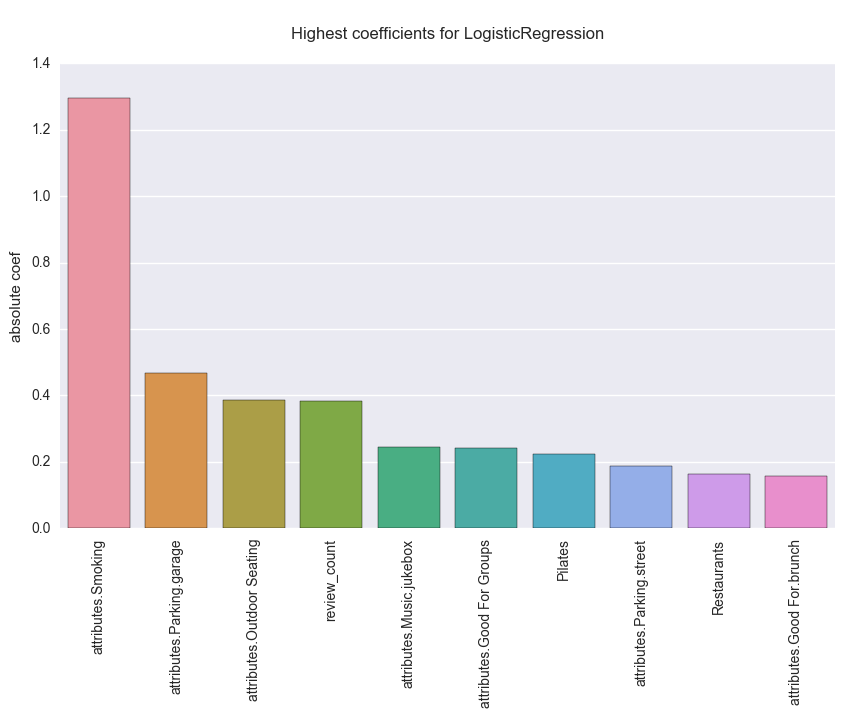

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = 'variable',y='abscoef', data = top_coefs)
plt.xticks(rotation = 90)

ax.set_title('\nHighest coefficients for LogisticRegression\n')
ax.set(xlabel = '',ylabel = 'absolute coef')


In [ ]:
# unfortunately, smoking is -by far- the best indicator that your business is located in Las Vegas...

In [344]:
y_pred = lr_gs.best_estimator_.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion
# there is a problem with our confusion matrix here..I do not really understand why

Predicted,1,All
Actual,,
0,533,533
1,831,831
All,1364,1364


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
project_id = "bigquery-dsi-medhi"


sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
LIMIT 30000
"""

reviews = pd.read_gbq(sql, project_id=project_id)

In [ ]:
# I just selected the first 3K rows, as it would have taken too long otherwise.

In [ ]:
reviews.head()

In [ ]:
for col in reviews.columns:
    print col

In [362]:
# First, why not grouping the columns that are not "reviews" per say.. (these are the first 8 columns):

In [361]:
non_reviews = reviews.ix[:,0:8]

In [ ]:
service_focused = reviews[[
        'minutes_10',
        'minutes_15',
        'minutes_20',
        'minutes_30',
        'bottle_service',
        'customer_service',
        'food_service',
        'friendly_staff',
        'good_service',
        'great_service',
        'minutes_later',
        'really_nice',
        'service_excellent',
        'service_food',
        'service_friendly',
        'service_good',
        'service_great',
        'staff_friendly',
        'super_friendly',
        'wait_staff']]

In [363]:
non_service_related = reviews[reviews.columns - non_reviews.columns - service_focused.columns]

/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [ ]:
# nb: now we have 4 different dataframes:

# A. reviews: the original dataframe (108 columns)

# B. non_reviews: contains columns related to business (9 columns)
# C. service_focused : contains only review columns related to service (16 columns)
# D. non_service_related : contains only review columns not related to service (83 columns)

In [ ]:
# we want to see the distribution of service and non_service related reviews
# let's first aggregate the scores for each of these reviews categories.

In [ ]:
service_focused['total_service_reviews'] = service_focused.sum(axis = 1)
non_service_related['total_non_service_reviews'] = non_service_related.sum(axis = 1)

In [ ]:
# then, we aggregate these 2 new columns with our 'non-reviews' dataframe

In [ ]:
service_vs_not = pd.concat((non_reviews[['user_id','review_id','business_id']],service_focused['total_service_reviews'],non_service_related['total_non_service_reviews'] ), axis = 1)
service_vs_not.mean()

In [367]:
# is the review talking more about service than other things?
# how about creating a new column for that?

In [382]:
service_vs_not.head()

,user_id,review_id,business_id,total_service_reviews,total_non_service_reviews,talking bout service
0,ziB5wYaCazX3j6gv8LP4Tg,wOIT2lKMSJeeVbVbe2NGSw,A8q8miBWQ5-wgLwuE1L-2Q,0,0,1
1,3hPmlMAP3PfHMiwNW_RUZg,k6xUz-kSyZx9g7vsrD9l-w,-sC66z4SO3tR7nFCjfQwuQ,0,0,1
2,W4fBHIRoNh_qAJwORXKPpg,mwDFukeeyYju1FLPHjzPJg,-sC66z4SO3tR7nFCjfQwuQ,0,1,0
3,thdVzCfKx-DV0zYWqId3pw,rr6sGQZ6g2s71JlqknPEMw,-sC66z4SO3tR7nFCjfQwuQ,1,1,1
4,cZU8RzTbGyt8nnSg7lHX8w,zQnoH2XyK3saSTp4YE4z5Q,s93PtWxihLbhK5Jg_FttzA,0,2,0


In [378]:
service_vs_not['talking bout service']=0

In [381]:
rather_service = service_vs_not['total_service_reviews'] >= service_vs_not['total_non_service_reviews']
service_vs_not['talking bout service'][rather_service]=1

/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [383]:
service_vs_not['talking bout service'].value_counts()

0    15478
1    14522
Name: talking bout service, dtype: int64

In [ ]:
# 50% of the reviews leave more or the same amount of service related reviews than any other type of reviews.

/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


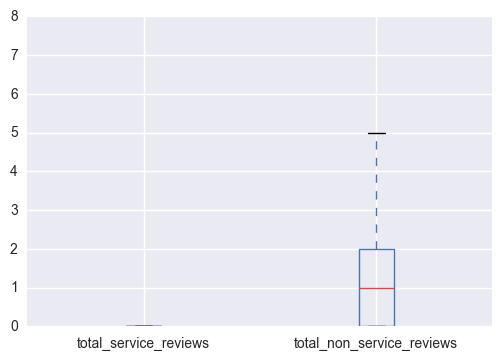

In [384]:
axes = plt.gca()
axes.set_ylim([0,8])
service_vs_not[['total_service_reviews','total_non_service_reviews']].boxplot()
plt.show()

In [ ]:
# on average, people let 0.98 reviews on service and 1.2 reviews not on service.

In [389]:
two_types_reviewed = service_vs_not [(service_vs_not.total_service_reviews >= 1) & (service_vs_not.total_non_service_reviews >= 1)]
two_types_reviewed.mean()

total_service_reviews        1.282965
total_non_service_reviews    2.153728
talking bout service         0.511043
dtype: float64

In [ ]:
# when people let at least one service related AND one non service related review, 
# --> they tend to leave twice as much service related reviews.

In [ ]:
service_vs_not.total_service_reviews [(service_vs_not.total_service_reviews >= 1)].value_counts()

In [ ]:
axes = plt.gca()
axes.set_ylim([0,8])

two_types_reviewed[['total_service_reviews','total_non_service_reviews']].boxplot()
plt.show()

In [ ]:
at_least_one_type_reviewed = service_vs_not [(service_vs_not.total_service_reviews >= 1) or (service_vs_not.total_non_service_reviews >= 1)]
at_least_one_type_reviewed.mean()

In [ ]:
reviews['stars'].value_counts()

In [ ]:
reviews['stars'] = reviews['stars'].convert_objects(convert_numeric = True)
reviews['stars'].mean()

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.distplot(reviews['stars'],ax = ax, kde = False)



In [ ]:
# let's predict the number of stars based on two different predictors:
# A. the service-related ones
# B. the non service related ones

In [ ]:
# A. the service-related ones
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = service_focused.values
y = reviews['stars'].values

scores = []
log_reg = LogisticRegression()

for i in range (1,20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    log_reg_model = log_reg.fit(X_train,y_train)
    scores.append(log_reg_model.score(X_test, y_test))

for score in scores:
    print score
print "scores mean for service_related reviews = ",np.mean(scores)

In [ ]:
# B. the non service related ones
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

X = non_service_related.values
y = reviews['stars'].values

scores = []
log_reg = LogisticRegression()

for i in range (1,20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    log_reg_model = log_reg.fit(X_train,y_train)
    scores.append(log_reg_model.score(X_test, y_test))

for score in scores:
    print score
print "scores mean for non_service_related reviews = ",np.mean(scores)

In [ ]:
# it seems that non service related reviews explain more of the variance in the ratings by 0.5
# there are two different kinds of ratings

In [403]:
# let's try another approach to this problem.
# let's create 2 new columns in the reviews dataframe, that tell if the overall review talks more about:
# the service ("talking bout service")
# or 
# the other factors ("talking bout others")

In [390]:
service_vs_not.head()

,user_id,review_id,business_id,total_service_reviews,total_non_service_reviews,talking bout service
0,ziB5wYaCazX3j6gv8LP4Tg,wOIT2lKMSJeeVbVbe2NGSw,A8q8miBWQ5-wgLwuE1L-2Q,0,0,1
1,3hPmlMAP3PfHMiwNW_RUZg,k6xUz-kSyZx9g7vsrD9l-w,-sC66z4SO3tR7nFCjfQwuQ,0,0,1
2,W4fBHIRoNh_qAJwORXKPpg,mwDFukeeyYju1FLPHjzPJg,-sC66z4SO3tR7nFCjfQwuQ,0,1,0
3,thdVzCfKx-DV0zYWqId3pw,rr6sGQZ6g2s71JlqknPEMw,-sC66z4SO3tR7nFCjfQwuQ,1,1,1
4,cZU8RzTbGyt8nnSg7lHX8w,zQnoH2XyK3saSTp4YE4z5Q,s93PtWxihLbhK5Jg_FttzA,0,2,0


In [392]:
reviews.head()

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,ziB5wYaCazX3j6gv8LP4Tg,wOIT2lKMSJeeVbVbe2NGSw,1,A8q8miBWQ5-wgLwuE1L-2Q,0,4,2012-12-15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3hPmlMAP3PfHMiwNW_RUZg,k6xUz-kSyZx9g7vsrD9l-w,0,-sC66z4SO3tR7nFCjfQwuQ,0,4,2011-02-24,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,W4fBHIRoNh_qAJwORXKPpg,mwDFukeeyYju1FLPHjzPJg,1,-sC66z4SO3tR7nFCjfQwuQ,0,4,2012-06-03,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,thdVzCfKx-DV0zYWqId3pw,rr6sGQZ6g2s71JlqknPEMw,1,-sC66z4SO3tR7nFCjfQwuQ,1,4,2013-01-20,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,cZU8RzTbGyt8nnSg7lHX8w,zQnoH2XyK3saSTp4YE4z5Q,0,s93PtWxihLbhK5Jg_FttzA,0,4,2014-11-18,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [393]:
print "reviews.shape = ", reviews.shape
print "service_vs_not.shape = ", service_vs_not.shape

reviews.shape =  (30000, 108)
service_vs_not.shape =  (30000, 6)


In [399]:
reviews = pd.concat([reviews,service_vs_not['talking bout service']], axis = 1)

In [401]:
reviews['talking bout others'] = 1 -  reviews['talking bout service']

In [402]:
reviews.head()

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,talking bout service,talking bout others
0,ziB5wYaCazX3j6gv8LP4Tg,wOIT2lKMSJeeVbVbe2NGSw,1,A8q8miBWQ5-wgLwuE1L-2Q,0,4,2012-12-15,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3hPmlMAP3PfHMiwNW_RUZg,k6xUz-kSyZx9g7vsrD9l-w,0,-sC66z4SO3tR7nFCjfQwuQ,0,4,2011-02-24,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,W4fBHIRoNh_qAJwORXKPpg,mwDFukeeyYju1FLPHjzPJg,1,-sC66z4SO3tR7nFCjfQwuQ,0,4,2012-06-03,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,thdVzCfKx-DV0zYWqId3pw,rr6sGQZ6g2s71JlqknPEMw,1,-sC66z4SO3tR7nFCjfQwuQ,1,4,2013-01-20,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,cZU8RzTbGyt8nnSg7lHX8w,zQnoH2XyK3saSTp4YE4z5Q,0,s93PtWxihLbhK5Jg_FttzA,0,4,2014-11-18,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [405]:
# great, we now have our 2 new columns.
# the goal here is to build two models:

# A. one that predicts the "talking bout service" column
# B. one that predicts the "talking bout others" column

# using the same predictors (= the reviews).
# Comparing the coefficients for each of these models will help us tell how accurate the split we initially made (service vs others) was.

In [ ]:
#A. Predicting the "talking bout service" column

In [439]:
sf_cols = service_focused.columns.values.tolist()
ns_cols = non_service_related.columns.values.tolist()

review_cols = sf_cols
review_cols.extend(ns_cols)
review_cols

#sf_cols

['minutes_10',
 'minutes_15',
 'minutes_20',
 'minutes_30',
 'bottle_service',
 'customer_service',
 'food_service',
 'friendly_staff',
 'good_service',
 'great_service',
 'minutes_later',
 'really_nice',
 'service_excellent',
 'service_food',
 'service_friendly',
 'service_good',
 'service_great',
 'staff_friendly',
 'super_friendly',
 'wait_staff',
 'total_service_reviews',
 'bar_food',
 'beer_selection',
 'best_ve',
 'bloody_mary',
 'chicken_waffles',
 'dance_floor',
 'decided_try',
 'definitely_come',
 'definitely_recommend',
 'didn_want',
 'don_know',
 'don_like',
 'don_think',
 'don_want',
 'eggs_benedict',
 'fast_food',
 'feel_like',
 'felt_like',
 'fish_chips',
 'food_amazing',
 'food_came',
 'food_delicious',
 'food_good',
 'food_great',
 'food_just',
 'french_fries',
 'french_toast',
 'friday_night',
 'fried_chicken',
 'good_food',
 'good_place',
 'good_thing',
 'good_time',
 'great_atmosphere',
 'great_experience',
 'great_food',
 'great_place',
 'great_time',
 'happy_hour',

In [444]:
reviews

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,talking bout service,talking bout others
0,ziB5wYaCazX3j6gv8LP4Tg,wOIT2lKMSJeeVbVbe2NGSw,1,A8q8miBWQ5-wgLwuE1L-2Q,0,4,2012-12-15,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3hPmlMAP3PfHMiwNW_RUZg,k6xUz-kSyZx9g7vsrD9l-w,0,-sC66z4SO3tR7nFCjfQwuQ,0,4,2011-02-24,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,W4fBHIRoNh_qAJwORXKPpg,mwDFukeeyYju1FLPHjzPJg,1,-sC66z4SO3tR7nFCjfQwuQ,0,4,2012-06-03,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,thdVzCfKx-DV0zYWqId3pw,rr6sGQZ6g2s71JlqknPEMw,1,-sC66z4SO3tR7nFCjfQwuQ,1,4,2013-01-20,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,cZU8RzTbGyt8nnSg7lHX8w,zQnoH2XyK3saSTp4YE4z5Q,0,s93PtWxihLbhK5Jg_FttzA,0,4,2014-11-18,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,XUxo3knfzuPLVcQQdb7EQQ,a5w5gntcQy1ySlQVsyFuWA,1,ZEdaJ8mcMpPiFWgDuSPqeA,0,4,2012-07-22,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Dpi50FrVtvy8Sh7TVbwetg,XNKoRLuW5KbbAtzfFQGjDA,1,ZEdaJ8mcMpPiFWgDuSPqeA,0,4,2015-07-05,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,wCvSVTTpwc4vLSdj_FW9_g,SX_z2T64-4Fi7KMjCeljpw,0,7tTK3VPlFtBGBHm8-LZIUg,0,4,2012-07-30,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,z0ITifJpUHJYl02Y_zzScQ,pT4uBytq5hSXMzenRRZhRw,0,EolW2H_wkpYwWbBURN_4gQ,0,4,2014-06-24,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,rTpbDSWIyCgAJvpI2MUhtg,EmSlRGJGhpydO_Q0O8AwAA,0,EolW2H_wkpYwWbBURN_4gQ,2,4,2015-10-26,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [460]:
X_bis = pd.concat([service_focused,non_service_related],axis = 1)
del X_bis['total_service_reviews']
X_bis.shape

(30000, 100)

In [449]:
y_bis = reviews['talking bout service']
y_bis.shape

(30000,)

In [464]:
lr = LogisticRegression()

scores = []
for i in range(1,10):
    X_bis_train, X_bis_test, y_bis_train, y_bis_test = train_test_split(X_bis, y_bis, test_size=0.33, random_state=42)
    lr_model_2 = lr.fit(X_bis_train, y_bis_train)
    scores.append(lr_model_2.score(X_bis_test,y_bis_test))

for score in scores:
    print score
    

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [465]:
coefs_vars_2 = pd.DataFrame({
     'coef': lr_model_2.coef_[0],
    'variable' : X_bis.columns,
        'abscoef' : np.abs(lr_model_2.coef_[0])    
    })
coefs_vars_2.sort_values('abscoef',ascending = False, inplace = True)
coefs_vars_2.head(10)

,abscoef,coef,variable
66,5.817549,-5.817549,las_vegas
87,5.713833,-5.713833,really_good
56,5.639495,-5.639495,great_place
73,5.612144,-5.612144,love_place
84,5.584425,-5.584425,pretty_good
42,5.554917,-5.554917,food_good
36,5.411153,-5.411153,feel_like
35,5.408694,-5.408694,fast_food
58,5.396780,-5.396780,happy_hour
60,5.388821,-5.388821,highly_recommend


In [ ]:
# now that we do have the coefs for the reviews columns that predict the service related column, let's do the same for the non service related columns.

In [ ]:
#B. Predicting the "talking bout others" column

In [470]:
y_bis3 = reviews['talking bout others']

In [472]:
lr = LogisticRegression()

scores3 = []
for i in range(1,10):
    X_bis_train3, X_bis_test3, y_bis_train3, y_bis_test3 = train_test_split(X_bis, y_bis3, test_size=0.33, random_state=42)
    lr_model_3 = lr.fit(X_bis_train3, y_bis_train3)
    scores3.append(lr_model_3.score(X_bis_test3,y_bis_test3))

for score in scores3:
    print score

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [473]:
coefs_vars_3 = pd.DataFrame({
     'coef': lr_model_3.coef_[0],
    'variable' : X_bis.columns,
        'abscoef' : np.abs(lr_model_3.coef_[0])    
    })
coefs_vars_3.sort_values('abscoef',ascending = False, inplace = True)
coefs_vars_3.head(10)

,abscoef,coef,variable
66,5.817549,5.817549,las_vegas
87,5.713833,5.713833,really_good
56,5.639495,5.639495,great_place
73,5.612144,5.612144,love_place
84,5.584425,5.584425,pretty_good
42,5.554917,5.554917,food_good
36,5.411153,5.411153,feel_like
35,5.408694,5.408694,fast_food
58,5.396780,5.396780,happy_hour
60,5.388821,5.388821,highly_recommend


In [ ]:
# apparently, the selection we initially made does not really reflect the "true" split between service-related and non-service related reviews.
# there is no clear distinction between these kinds of reviews, looking at the customers' reviews.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [475]:
project_id = "bigquery-dsi-medhi"


sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 
LIMIT 30000
"""

users = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 15.2 Mb

Retrieving results...
  Got page: 1; 56.0% done. Elapsed 9.74 s.
  Got page: 2; 100.0% done. Elapsed 13.52 s.
Got 30000 rows.

Total time taken 15.29 s.
Finished at 2016-12-20 09:31:35.


In [476]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
yelping_since          30000 non-null object
compliments_plain      18334 non-null float64
review_count           30000 non-null int64
compliments_cute       8001 non-null float64
compliments_writer     15030 non-null float64
fans                   30000 non-null int64
compliments_note       16970 non-null float64
compliments_hot        14668 non-null float64
compliments_cool       18486 non-null float64
compliments_profile    7003 non-null float64
average_stars          30000 non-null float64
compliments_more       12755 non-null float64
elite                  30000 non-null object
name                   30000 non-null object
user_id                30000 non-null object
votes_cool             30000 non-null int64
compliments_list       4915 non-null object
votes_funny            30000 non-null int64
compliments_photos     9316 non-null object
compliments_funny      13939 non-nu

In [ ]:
# let's categorise a user as elite if he's been elite at least one year.

In [478]:
users.head()

,yelping_since,compliments_plain,review_count,compliments_cute,compliments_writer,fans,compliments_note,compliments_hot,compliments_cool,compliments_profile,...,compliments_more,elite,name,user_id,votes_cool,compliments_list,votes_funny,compliments_photos,compliments_funny,votes_useful
0,2009-02,11.0,177,3.0,3.0,19,5.0,10.0,8.0,1.0,...,1.0,[2010],Tiffany,aOJ4uZRLWa0lSywn2g7u-g,119,1.0,128,5.0,4.0,293
1,2009-02,10.0,213,NaN,3.0,6,3.0,6.0,4.0,NaN,...,NaN,"[2012, 2013, 2014, 2015]",Danielle,G_U1bVf5wOA1tudWuyuJqg,97,None,42,1.0,NaN,325
2,2009-02,59.0,246,2.0,16.0,5,27.0,17.0,47.0,1.0,...,10.0,"[2010, 2011, 2012]",Brandon,qbVQI5kPK7q1LkQ13I7xIQ,235,1.0,218,5.0,19.0,405
3,2009-02,7.0,254,NaN,9.0,11,4.0,2.0,12.0,1.0,...,1.0,"[2010, 2011, 2012, 2013, 2014, 2015]",Chris,QRKInqQVBZn_8XCvckh6Og,139,1.0,88,2.0,4.0,421
4,2009-02,55.0,257,4.0,15.0,14,22.0,37.0,71.0,2.0,...,5.0,"[2010, 2011, 2012]",Michael,rx--WdQuyFrUaLl8Hk0AAw,326,1.0,335,6.0,25.0,618


In [484]:
users['ever_been_elite'] = users['elite'].map(lambda x: 0 if x == '[]' else 1)

In [486]:
users['ever_been_elite'].value_counts()

0    21264
1     8736
Name: ever_been_elite, dtype: int64

In [488]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
yelping_since          30000 non-null object
compliments_plain      18334 non-null float64
review_count           30000 non-null int64
compliments_cute       8001 non-null float64
compliments_writer     15030 non-null float64
fans                   30000 non-null int64
compliments_note       16970 non-null float64
compliments_hot        14668 non-null float64
compliments_cool       18486 non-null float64
compliments_profile    7003 non-null float64
average_stars          30000 non-null float64
compliments_more       12755 non-null float64
elite                  30000 non-null object
name                   30000 non-null object
user_id                30000 non-null object
votes_cool             30000 non-null int64
compliments_list       4915 non-null object
votes_funny            30000 non-null int64
compliments_photos     9316 non-null object
compliments_funny      13939 non-nu

In [504]:
del users['compliments_plain']
del users['compliments_cute']
del users['compliments_writer']
del users['compliments_profile']
del users['compliments_more']
del users['compliments_list']
del users['compliments_photos']
del users['compliments_funny']


In [509]:
#del users['compliments_cool']
#del users['compliments_hot']
del users['compliments_note']

In [511]:
del users['elite']

In [527]:
users.head()

,yelping_since,review_count,fans,average_stars,name,user_id,votes_cool,votes_funny,votes_useful,ever_been_elite
0,2009-02-01,177,19,3.54,Tiffany,aOJ4uZRLWa0lSywn2g7u-g,119,128,293,1
1,2009-02-01,213,6,4.09,Danielle,G_U1bVf5wOA1tudWuyuJqg,97,42,325,1
2,2009-02-01,246,5,3.74,Brandon,qbVQI5kPK7q1LkQ13I7xIQ,235,218,405,1
3,2009-02-01,254,11,3.40,Chris,QRKInqQVBZn_8XCvckh6Og,139,88,421,1
4,2009-02-01,257,14,3.71,Michael,rx--WdQuyFrUaLl8Hk0AAw,326,335,618,1


In [528]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
yelping_since      30000 non-null datetime64[ns]
review_count       30000 non-null int64
fans               30000 non-null int64
average_stars      30000 non-null float64
name               30000 non-null object
user_id            30000 non-null object
votes_cool         30000 non-null int64
votes_funny        30000 non-null int64
votes_useful       30000 non-null int64
ever_been_elite    30000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 2.3+ MB


In [548]:
nc = [col for col in users.columns if (col != 'name') & (col != 'user_id') & (col != 'ever_been_elite') &(col != 'yelping_since')]

In [549]:
X = users[nc].values

In [550]:
y = users['ever_been_elite'].values

In [551]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
yelping_since      30000 non-null datetime64[ns]
review_count       30000 non-null int64
fans               30000 non-null int64
average_stars      30000 non-null float64
name               30000 non-null object
user_id            30000 non-null object
votes_cool         30000 non-null int64
votes_funny        30000 non-null int64
votes_useful       30000 non-null int64
ever_been_elite    30000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 2.3+ MB


In [552]:
users.head()

,yelping_since,review_count,fans,average_stars,name,user_id,votes_cool,votes_funny,votes_useful,ever_been_elite
0,2009-02-01,177,19,3.54,Tiffany,aOJ4uZRLWa0lSywn2g7u-g,119,128,293,1
1,2009-02-01,213,6,4.09,Danielle,G_U1bVf5wOA1tudWuyuJqg,97,42,325,1
2,2009-02-01,246,5,3.74,Brandon,qbVQI5kPK7q1LkQ13I7xIQ,235,218,405,1
3,2009-02-01,254,11,3.40,Chris,QRKInqQVBZn_8XCvckh6Og,139,88,421,1
4,2009-02-01,257,14,3.71,Michael,rx--WdQuyFrUaLl8Hk0AAw,326,335,618,1


In [553]:
lr = LogisticRegression()
scores = [ ]

for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    lr_model = lr.fit(X_train,y_train)
    
    scores.append(lr_model.score(X_test,y_test))

for score in scores:
    print score
    
print "mean of scores = ",np.mean(scores)

0.883535353535
0.881717171717
0.876767676768
0.88
0.874141414141
0.878383838384
0.876161616162
0.886363636364
0.878585858586
0.877272727273
0.87595959596
0.879292929293
0.88
0.877676767677
0.879898989899
0.880303030303
0.879595959596
0.878383838384
0.879797979798
mean of scores =  0.879149388623


In [554]:
print lr_model.coef_

[[ 0.01  0.14  0.21 -0.   -0.    0.  ]]


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?